  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  3.398e-04 ...  1.500e+01  1.500e+01]
        y: [[ 2.000e+01  1.998e+01 ...  1.129e-03  1.120e-03]
            [ 5.000e+00  5.032e+00 ...  1.775e+01  1.774e+01]]
      sol: <scipy.integrate._ivp.common.OdeSolution object at 0x000001C29213DDE0>
 t_events: None
 y_events: None
     nfev: 36518
     njev: 0
      nlu: 0


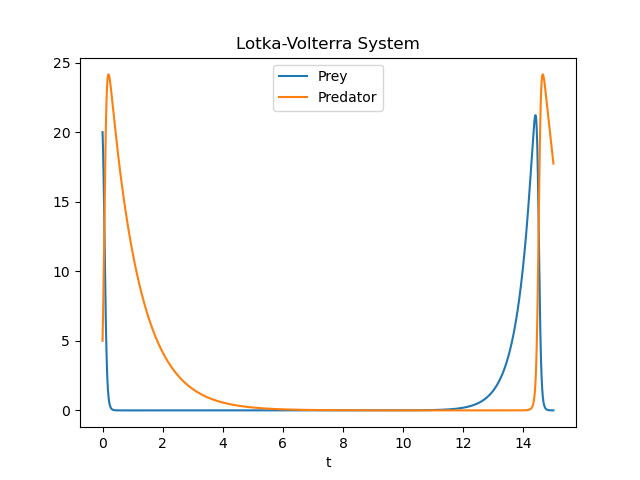

In [16]:
import numpy as np
import scipy as sp
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import pandas as pd
def derivative_x(t, z, a=2, b=1, c=1, d=1):
    x, y = z
    return [a*x - b*x*y, -c*y + d*x*y]
x0=[20,5]
t0=0
tf=15
x_aprox=solve_ivp(derivative_x,[t0,tf],x0,dense_output=True,atol=1e-200,rtol=1e-13)

print(x_aprox)
plt.close()
plt.plot(x_aprox.t,x_aprox.y.T)
plt.xlabel('t')
plt.legend(['Prey',"Predator"])
plt.title('Lotka-Volterra System')
plt.show()

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  4.941e-323 ...  9.828e-01  1.000e+00]
        y: [[ 0.000e+00  0.000e+00 ...  2.401e+00  2.654e+00]
            [ 0.000e+00  0.000e+00 ...  1.401e+01  1.535e+01]]
      sol: <scipy.integrate._ivp.common.OdeSolution object at 0x000001C28CC712D0>
 t_events: None
 y_events: None
     nfev: 8402
     njev: 0
      nlu: 0


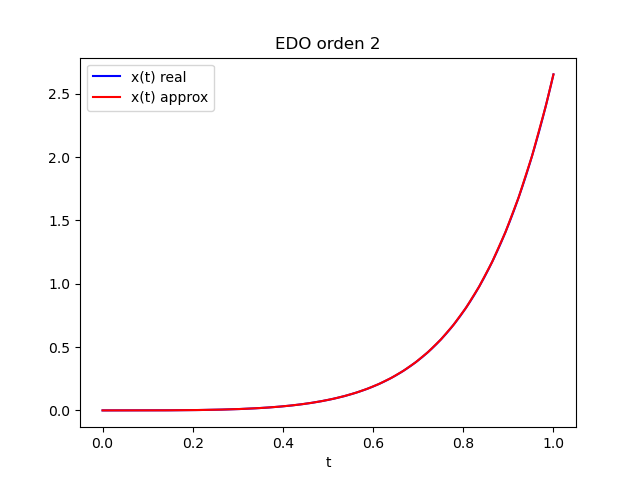

In [1]:
import numpy as np
import scipy as sp
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import pandas as pd
def orden2_reduction(t, z):
    x, y = z
    return [y, (t**2+t)*np.exp(3*t)+3*y-2*x]
def xt(t): return -np.exp(2*t)+(0.5*t**2-t+1)*np.exp(3*t)
x0=[0,0]
t0=0
tf=1
x_aprox=solve_ivp(orden2_reduction,[t0,tf],x0,dense_output=True,atol=1e-200,rtol=1e-13,method="DOP853")
plt.close()
%matplotlib widget
print(x_aprox)
t=np.linspace(t0,tf,len(x_aprox.t)+200)
plt.plot(t,xt(t),color="blue")
plt.plot(x_aprox.t,x_aprox.y[0,:],color="red")
plt.xlabel('t')
plt.legend(['x(t) real','x(t) approx'])
plt.title('EDO orden 2')
plt.show()



  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  3.162e-09 ...  4.000e+00  4.000e+00]
        y: [[ 1.000e+00  1.000e+00 ... -5.514e-01 -5.532e-01]
            [ 1.000e+00  1.000e+00 ... -8.114e+00 -8.101e+00]]
      sol: <scipy.integrate._ivp.common.OdeSolution object at 0x000001C28E23BD30>
 t_events: None
 y_events: None
     nfev: 11435
     njev: 311
      nlu: 311


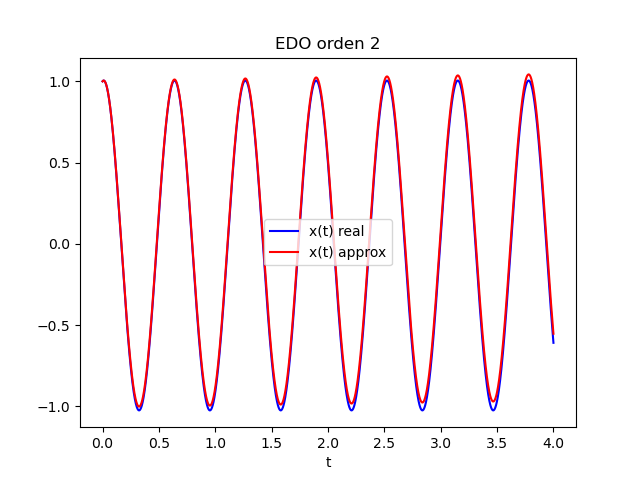

In [4]:
def orden2_reduction(t, z,a=-100):
    x, y = z
    return [y, t+a*x]
def xt(t,a=-100):
    C1=1-1/a
    C2=1/(-a)**(1/2)
    return C1*np.cos(t*(-a)**(1/2))+C2*np.sin(t*(-a)**(1/2))+1/a

x0=[1,1]
t0=0
tf=4

x_aprox=solve_ivp(orden2_reduction,[t0,tf],x0,dense_output=True,atol=1e-200,rtol=1e-13,method="LSODA")
plt.close()
%matplotlib widget
print(x_aprox)
t=np.linspace(t0,tf,len(x_aprox.t)+200)
plt.plot(t,xt(t),color="blue")
plt.plot(x_aprox.t,x_aprox.y[0,:],color="red")
plt.xlabel('t')
plt.legend(['x(t) real','x(t) approx'])
plt.title('EDO orden 2')
plt.show()

